In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set(color_codes=True)

In [4]:
df_states = pd.read_csv('covid-19-data/us-states.csv')
df_counties = pd.read_csv('covid-19-data/us-counties.csv')

In [5]:
df_states.head()

date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0

In [6]:
df_states = df_states.sort_values(by=['state', 'date'])
df_states_mat = df_states.pivot_table(index='date', columns='state', values='cases')
df_states_mat.fillna(0, inplace=True)
df_states_mat.head()

for col in df_states_mat.columns:
    df_states_mat[col + ' new cases'] = df_states_mat[col].diff()
df_states_mat.sort_values('date', ascending=False).head()

state       Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
date                                                                   
2020-04-28   6750.0   349.0   6948.0    3127.0     46570.0   14239.0   
2020-04-27   6539.0   343.0   6716.0    3069.0     45208.0   13804.0   
2020-04-26   6421.0   339.0   6526.0    3001.0     43691.0   13441.0   
2020-04-25   6213.0   337.0   6280.0    2909.0     42590.0   12968.0   
2020-04-24   6026.0   337.0   6045.0    2810.0     41368.0   12255.0   

state       Connecticut  Delaware  District of Columbia  Florida  \
date                                                               
2020-04-28      26312.0    4575.0                3994.0  32838.0   
2020-04-27      25997.0    4162.0                3892.0  32130.0   
2020-04-26      25269.0    4034.0                3841.0  31520.0   
2020-04-25      24582.0    3576.0                3699.0  30831.0   
2020-04-24      23921.0    3442.0                3528.0  30525.0   

state             ...          Tennessee new cases  Texas new cases  \
date              ...                                                 
2020-04-28        ...                        235.0            905.0   
2020-04-27        ...                        303.0            754.0   
2020-04-26        ...                        516.0            712.0   
2020-04-25        ...                        298.0            844.0   
2020-04-24        ...                        449.0            944.0   

state       Utah new cases  Vermont new cases  Virgin Islands new cases  \
date                                                                      
2020-04-28           107.0                7.0                       0.0   
2020-04-27           113.0                4.0                       2.0   
2020-04-26           173.0                8.0                       2.0   
2020-04-25           168.0               16.0                       1.0   
2020-04-24           161.0                2.0                       0.0   

state       Virginia new cases  Washington new cases  West Virginia new cases  \
date                                                                            
2020-04-28               804.0                 195.0                     18.0   
2020-04-27               565.0                 201.0                     24.0   
2020-04-26               604.0                 179.0                     28.0   
2020-04-25               770.0                 364.0                     15.0   
2020-04-24               596.0                 214.0                     29.0   

state       Wisconsin new cases  Wyoming new cases  
date                                                
2020-04-28                208.0                7.0  
2020-04-27                170.0               18.0  
2020-04-26                224.0                9.0  
2020-04-25                331.0               13.0  
2020-04-24                304.0               17.0  

[5 rows x 110 columns]

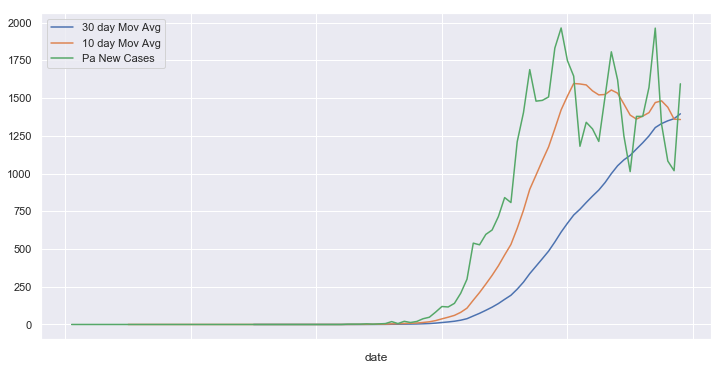

In [7]:
plt.figure(figsize=(12,6))
df_states_mat['Pennsylvania new cases'].rolling(window=30).mean().plot(label='30 day Mov Avg')
df_states_mat['Pennsylvania new cases'].rolling(window=10).mean().plot(label='10 day Mov Avg')
df_states_mat['Pennsylvania new cases'].plot(label='Pa New Cases')
plt.legend()

In [8]:
from datetime import datetime

In [9]:
df_totals = df_states.drop('fips', axis=1).groupby('date').sum().sort_values('date')
df_totals['date_ordinal'] = df_totals.index.map(lambda x: datetime.strptime(x, '%Y-%m-%d').toordinal() - 737470)
df_totals['new cases'] = df_totals['cases'].diff()
df_totals['new deaths'] = df_totals['deaths'].diff()
df_totals['cases pct chg'] = df_totals['cases'].pct_change() * 100
df_totals['deaths pct chg'] = df_totals['deaths'].pct_change() * 100
df_totals['new cases pct chg'] = df_totals['new cases'].pct_change() * 100
df_totals['new deaths pct chg'] = df_totals['new deaths'].pct_change() * 100
df_totals = df_totals.replace([np.inf, -np.inf], 1)
df_totals = df_totals.round(1)
df_totals = df_totals.loc['2020-03-01':]

In [10]:
df_totals.fillna(0.0, inplace=True)
df_totals.sort_values(by='date', ascending=False).head(10)

cases  deaths  date_ordinal  new cases  new deaths  \
date                                                               
2020-04-28  1012683   53034            73    24433.0      2215.0   
2020-04-27   988250   50819            72    23036.0      1355.0   
2020-04-26   965214   49464            71    26462.0      1139.0   
2020-04-25   938752   48325            70    34148.0      1822.0   
2020-04-24   904604   46503            69    36585.0      1987.0   
2020-04-23   868019   44516            68    33681.0      2021.0   
2020-04-22   834338   42495            67    28567.0      2179.0   
2020-04-21   805771   40316            66    25322.0      2521.0   
2020-04-20   780449   37795            65    27135.0      1686.0   
2020-04-19   753314   36109            64    25220.0      1383.0   

            cases pct chg  deaths pct chg  new cases pct chg  \
date                                                           
2020-04-28            2.5             4.4                6.1   
2020-04-27            2.4             2.7              -12.9   
2020-04-26            2.8             2.4              -22.5   
2020-04-25            3.8             3.9               -6.7   
2020-04-24            4.2             4.5                8.6   
2020-04-23            4.0             4.8               17.9   
2020-04-22            3.5             5.4               12.8   
2020-04-21            3.2             6.7               -6.7   
2020-04-20            3.6             4.7                7.6   
2020-04-19            3.5             4.0              -10.7   

            new deaths pct chg  
date                            
2020-04-28                63.5  
2020-04-27                19.0  
2020-04-26               -37.5  
2020-04-25                -8.3  
2020-04-24                -1.7  
2020-04-23                -7.3  
2020-04-22               -13.6  
2020-04-21                49.5  
2020-04-20                21.9  
2020-04-19               -23.8

In [11]:
df_totals.describe()

cases        deaths  date_ordinal     new cases   new deaths  \
count  5.900000e+01     59.000000     59.000000     59.000000    59.000000   
mean   3.133528e+05  13518.915254     44.000000  17162.932203   898.864407   
std    3.409033e+05  17296.175763     17.175564  13325.443903   889.743792   
min    8.800000e+01      3.000000     15.000000     16.000000     0.000000   
25%    4.053500e+03     79.500000     29.500000    804.500000    16.500000   
50%    1.635890e+05   3068.000000     44.000000  21395.000000   581.000000   
75%    5.940690e+05  24843.000000     58.500000  28945.000000  1819.000000   
max    1.012683e+06  53034.000000     73.000000  36585.000000  2521.000000   

       cases pct chg  deaths pct chg  new cases pct chg  new deaths pct chg  
count      59.000000       59.000000          59.000000           59.000000  
mean       18.362712       22.322034          19.898305           16.345763  
std        13.468928       28.376417          40.599085           39.711574  
min         2.400000        0.000000         -28.000000         -100.000000  
25%         4.900000        7.350000          -0.350000           -7.500000  
50%        15.000000       18.200000          10.000000           12.900000  
75%        29.550000       27.150000          30.000000           33.300000  
max        48.400000      200.000000         260.000000          187.500000

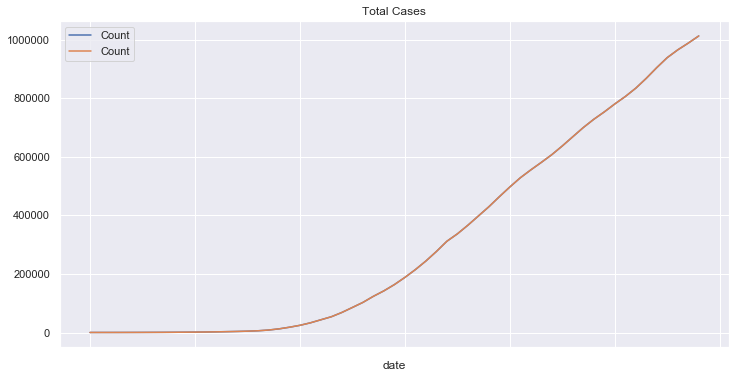

In [12]:
plt.figure(figsize=(12,6))
df_totals['cases'].plot(label='Count')
df_totals['cases'].plot(label='Count')
plt.title('Total Cases')
plt.legend()

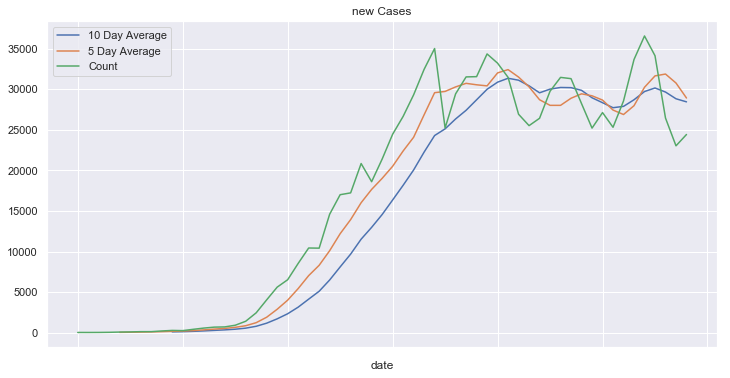

In [13]:
plt.figure(figsize=(12,6))
df_totals['new cases'].rolling(window=10).mean().plot(label='10 Day Average')
df_totals['new cases'].rolling(window=5).mean().plot(label='5 Day Average')
df_totals['new cases'].plot(label='Count')
plt.title('new Cases')
plt.legend()

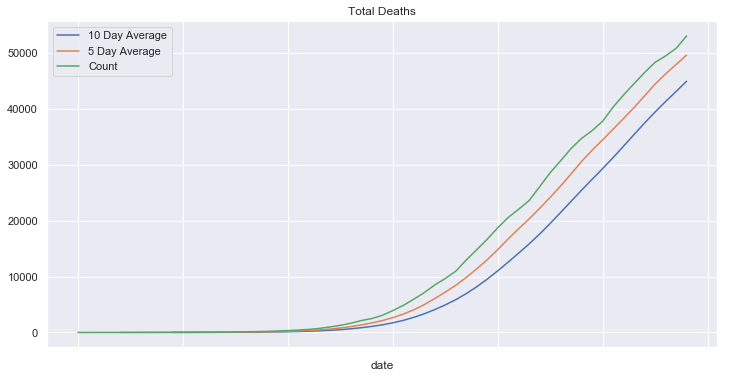

In [14]:
plt.figure(figsize=(12,6))
df_totals['deaths'].rolling(window=10).mean().plot(label='10 Day Average')
df_totals['deaths'].rolling(window=5).mean().plot(label='5 Day Average')
df_totals['deaths'].plot(label='Count')
plt.title('Total Deaths')
plt.legend()

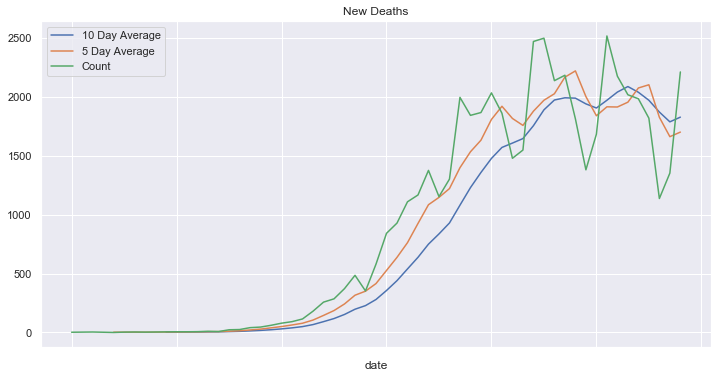

In [15]:
plt.figure(figsize=(12,6))
df_totals['new deaths'].rolling(window=10).mean().plot(label='10 Day Average')
df_totals['new deaths'].rolling(window=5).mean().plot(label='5 Day Average')
df_totals['new deaths'].plot(label='Count')
plt.title('New Deaths')
plt.legend()

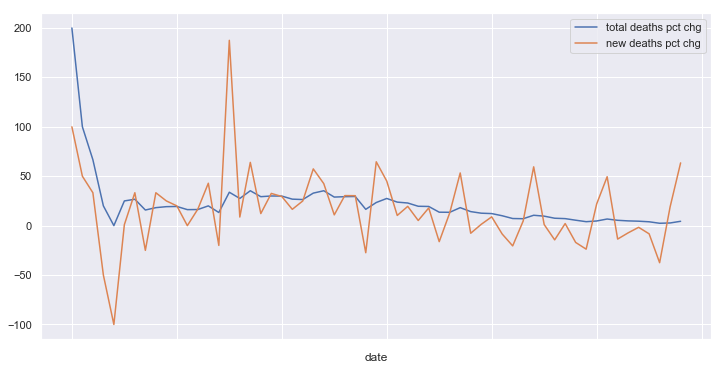

In [16]:
plt.figure(figsize=(12,6))
df_totals['deaths pct chg'].plot(label='total deaths pct chg')
df_totals['new deaths pct chg'].plot()
plt.legend()

/Users/dderman/.conda/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


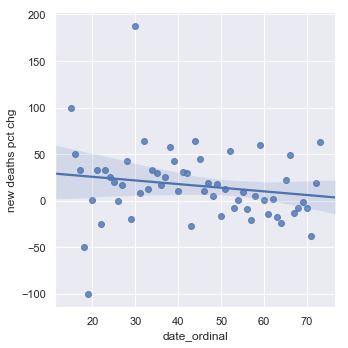

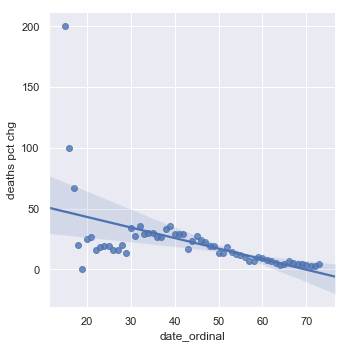

In [17]:
sns.lmplot(x='date_ordinal', y='new deaths pct chg', data=df_totals, fit_reg=True)
sns.lmplot(x='date_ordinal', y='deaths pct chg', data=df_totals, fit_reg=True)

In [18]:
df_counties.groupby('county').max().sort_values('cases', ascending=False)

date           state     fips   cases  deaths
county                                                                 
New York City       2020-04-28        New York      NaN  162348   12067
Nassau              2020-04-28        New York  36059.0   35085    2039
Cook                2020-04-28        Illinois  17031.0   33449    1457
Suffolk             2020-04-28        New York  36103.0   32724    1179
Westchester         2020-04-28        New York  36119.0   28245    1096
Los Angeles         2020-04-28      California   6037.0   20976    1000
Wayne               2020-04-28   West Virginia  54099.0   16173    1682
Bergen              2020-04-28      New Jersey  34003.0   15251    1002
Hudson              2020-04-28      New Jersey  34017.0   14309     722
Philadelphia        2020-04-28    Pennsylvania  42101.0   13445     516
Middlesex           2020-04-28        Virginia  51119.0   13417     731
Essex               2020-04-28        Virginia  51057.0   13190    1090
Union               2020-04-28       Tennessee  47173.0   12188     627
Miami-Dade          2020-04-28         Florida  12086.0   11830     324
Passaic             2020-04-28      New Jersey  34031.0   11755     475
Rockland            2020-04-28        New York  36087.0   11453     359
Fairfield           2020-04-28  South Carolina  45039.0   10874     747
Orange              2020-04-28        Virginia  51137.0    8389     223
New Haven           2020-04-28     Connecticut   9009.0    7089     478
Oakland             2020-04-28        Michigan  26125.0    7012     654
Orleans             2020-04-28         Vermont  50019.0    6380     410
Ocean               2020-04-28      New Jersey  34029.0    6151     342
Jefferson           2020-04-28       Wisconsin  55055.0    6135     340
King                2020-04-28      Washington  53033.0    6056     429
Harris              2020-04-28           Texas  48201.0    5986     103
Monmouth            2020-04-28      New Jersey  34025.0    5826     305
Norfolk             2020-04-28   Massachusetts  25021.0    5567     448
Providence          2020-04-28    Rhode Island  44007.0    5520     111
Prince George's     2020-04-28        Maryland  24033.0    5496     195
Macomb              2020-04-28        Michigan  26099.0    5339     572
...                        ...             ...      ...     ...     ...
Boundary            2020-04-12           Idaho  16021.0       1       0
Unicoi              2020-04-28       Tennessee  47171.0       1       0
Meagher             2020-04-28         Montana  30059.0       1       0
Bethel Census Area  2020-04-28          Alaska   2050.0       1       0
Wadena              2020-04-28       Minnesota  27159.0       1       0
Beaverhead          2020-04-28         Montana  30001.0       1       0
Barber              2020-04-28          Kansas  20007.0       1       0
Washburn            2020-04-28       Wisconsin  55129.0       1       0
Morrison            2020-04-28       Minnesota  27097.0       1       0
Motley              2020-04-28           Texas  48345.0       1       0
Camas               2020-04-28           Idaho  16025.0       1       0
Holt                2020-04-28        Missouri  29087.0       1       0
Catron              2020-04-28      New Mexico  35003.0       1       1
Hand                2020-04-28    South Dakota  46059.0       1       0
Nome Census Area    2020-04-28          Alaska   2180.0       1       0
Nolan               2020-04-28           Texas  48353.0       1       0
Stillwater          2020-04-28         Montana  30095.0       1       0
Niobrara            2020-04-28         Wyoming  56027.0       1       0
Harding             2020-04-28      New Mexico  35021.0       1       0
Harney              2020-04-28          Oregon  41025.0       1       0
Sublette            2020-04-28         Wyoming  56035.0       1       0
Harper              2020-04-28        Oklahoma  40059.0       1       0
Casey               2020-04-28        Kentucky  21045.0       1   

In [19]:
df_states.groupby('state').max().sort_values('deaths', ascending=False)

date  fips   cases  deaths
state                                                     
New York                  2020-04-28    36  295137   17638
New Jersey                2020-04-28    34  113856    6442
Michigan                  2020-04-28    26   39234    3566
Massachusetts             2020-04-28    25   58302    3153
Illinois                  2020-04-28    17   48102    2132
Pennsylvania              2020-04-28    42   45323    2092
Connecticut               2020-04-28     9   26312    2089
California                2020-04-28     6   46570    1884
Louisiana                 2020-04-28    22   27286    1758
Florida                   2020-04-28    12   32838    1170
Georgia                   2020-04-28    13   23607    1022
Maryland                  2020-04-28    24   20113     929
Indiana                   2020-04-28    18   16588     901
Ohio                      2020-04-28    39   16769     799
Washington                2020-04-28    53   14059     792
Texas                     2020-04-28    48   26865     738
Colorado                  2020-04-28     8   14239     734
Virginia                  2020-04-28    51   14339     492
North Carolina            2020-04-28    37    9568     353
Missouri                  2020-04-28    29    7408     324
Minnesota                 2020-04-28    27    4181     301
Wisconsin                 2020-04-28    55    6289     300
Arizona                   2020-04-28     4    6948     297
Alabama                   2020-04-28     1    6750     242
Rhode Island              2020-04-28    44    7926     239
Mississippi               2020-04-28    28    6342     239
Kentucky                  2020-04-28    21    4375     231
Nevada                    2020-04-28    32    4812     225
Oklahoma                  2020-04-28    40    3410     207
Tennessee                 2020-04-28    47   10031     198
South Carolina            2020-04-28    45    5735     192
District of Columbia      2020-04-28    11    3994     190
Delaware                  2020-04-28    10    4575     137
Iowa                      2020-04-28    19    6376     136
Kansas                    2020-04-28    20    3587     127
New Mexico                2020-04-28    35    2975     110
Oregon                    2020-04-28    41    2385      99
New Hampshire             2020-04-28    33    2010      60
Puerto Rico               2020-04-28    72    1400      60
Idaho                     2020-04-28    16    1810      60
Nebraska                  2020-04-28    31    3613      57
Arkansas                  2020-04-28     5    3127      57
Maine                     2020-04-28    23    1040      51
Vermont                   2020-04-28    50     862      47
Utah                      2020-04-28    49    4343      45
West Virginia             2020-04-28    54    1095      38
North Dakota              2020-04-28    38     991      19
Hawaii                    2020-04-28    15     602      16
Montana                   2020-04-28    30     451      15
South Dakota              2020-04-28    46    2314      11
Alaska                    2020-04-28     2     349       7
Wyoming                   2020-04-28    56     396       7
Guam                      2020-04-28    66    1001       6
Virgin Islands            2020-04-28    78      59       4
Northern Mariana Islands  2020-04-28    69      14       2

In [20]:
df_counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98262 entries, 0 to 98261
Data columns (total 6 columns):
date      98262 non-null object
county    98262 non-null object
state     98262 non-null object
fips      97083 non-null float64
cases     98262 non-null int64
deaths    98262 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.5+ MB


In [21]:
df_chester = df_counties[(df_counties['county'] == 'Chester') & (df_counties['state'] == 'Pennsylvania')].sort_values('date')
df_chester['new cases'] = df_chester['cases'].diff()
df_chester['new deaths'] = df_chester['deaths'].diff()
df_chester['date'] = df_chester['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df_chester['14 day cnt'] = df_chester['new cases'].rolling(window=14).sum()
df_chester = df_chester.dropna()

df_montgomery = df_counties[(df_counties['county'] == 'Montgomery') & (df_counties['state'] == 'Pennsylvania')].sort_values('date')
df_montgomery['new cases'] = df_montgomery['cases'].diff()
df_montgomery['new deaths'] = df_montgomery['deaths'].diff()
df_montgomery['date'] = df_montgomery['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df_montgomery['14 day cnt'] = df_montgomery['new cases'].rolling(window=14).sum()

df_berks = df_counties[(df_counties['county'] == 'Berks') & (df_counties['state'] == 'Pennsylvania')].sort_values('date')
df_berks['new cases'] = df_berks['cases'].diff()
df_berks['new deaths'] = df_berks['deaths'].diff()
df_berks['date'] = df_berks['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df_berks['14 day cnt'] = df_berks['new cases'].rolling(window=14).sum()


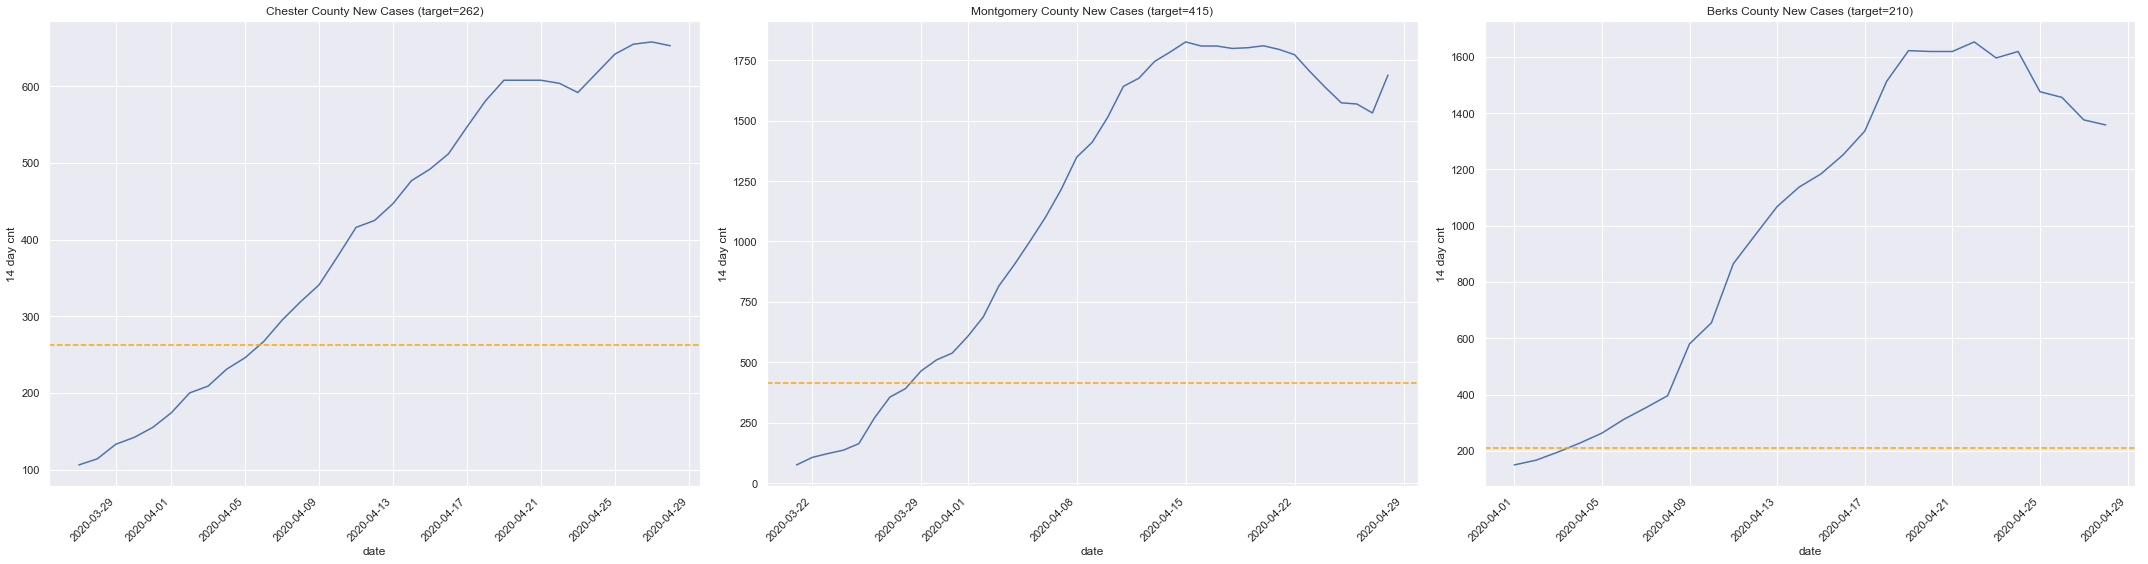

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharex=False, figsize=(30,8))
sns.lineplot(x='date', y='14 day cnt', ax=ax1, data=df_chester).set(title='Chester County New Cases (target=262)')
sns.lineplot(x='date', y='14 day cnt', ax=ax2, data=df_montgomery).set(title='Montgomery County New Cases (target=415)')
sns.lineplot(x='date', y='14 day cnt', ax=ax3, data=df_berks).set(title='Berks County New Cases (target=210)')
ax1.axhline(262, ls='--', color='orange')
ax2.axhline(415, ls='--', color='orange')
ax3.axhline(210, ls='--', color='orange')
plt.setp(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.setp(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.setp(ax3.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.tight_layout()